<a href="https://www.kaggle.com/code/manjitbaishya001/multi-label-toxic-comment-detection-acc-97-6?scriptVersionId=194634128" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **💀 Multi-label Toxic Comment Detection - ACC 97.6%**
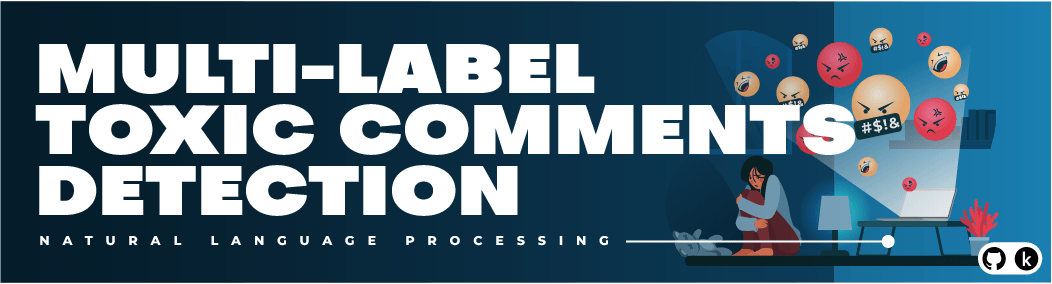<br>
A toxic comment detector can be immensely valuable in real-life scenarios, particularly in online platforms where user-generated content is prevalent. Social media, forums, and comment sections often face the challenge of managing harmful or abusive language, which can create a hostile environment for users. A toxic comment detector can automatically identify and flag such language, helping to maintain a positive and inclusive atmosphere. It can protect vulnerable groups from hate speech, prevent the spread of misinformation, and reduce the workload on human moderators by efficiently filtering out offensive content. In professional settings, such as workplace communication tools or educational platforms, it ensures that interactions remain respectful and constructive, fostering a healthier and more productive environment. Overall, toxic comment detection tools play a crucial role in promoting safe, respectful, and constructive online and offline communication.

# **⏬Importing Data**

In [1]:
# getting source data directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        src = (os.path.join(dirname, filename))

In [2]:
# importing data
import numpy as np
import pandas as pd

df = pd.read_csv(src)
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


# **🎡Getting Data Details**

In [3]:
# getting raw data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [4]:
# dropping columns that are not required
df = df.drop(['CommentId', 'VideoId'], axis=1)
df.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# defining label columns
label_cols = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

# labelling class as 0 or 1
df[label_cols] = df[label_cols].astype(int)
df.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0
1,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0
2,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0
3,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0,0,0
4,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0,0,0


# **🧹Data Cleaning**

In [6]:
# checking for null values
df.isna().sum()

Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [7]:
# checking for cuplicate entries
df.duplicated().sum()

2

In [8]:
# dropping duplicate entries
df = df.drop_duplicates()
df.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0
1,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0
2,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0
3,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0,0,0
4,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0,0,0


# **🧼Data Pre-Processing**

## **⚙Feature Engineering**
If the occurrence of a particular class is significantly lower than others, it can lead to overfitting. Therefore, we should consider dropping those underrepresented classes.

In [9]:
# min class occurance count
threshold = 100

# checking which classes meet the criteria
for col in df.columns[1:]:
    value_counts = df[col].value_counts()
    
    # check if both classes (0 and 1) exist for a feature
    # check if their occurrences are at least equal to the threshold
    if set(value_counts.index) == {0, 1} and all(count >= threshold for count in value_counts.values):
        print(f'{col}: {df[col].unique()}')
        print(value_counts)
        print('-------------------------------\n')

IsToxic: [0 1]
IsToxic
0    538
1    460
Name: count, dtype: int64
-------------------------------

IsAbusive: [0 1]
IsAbusive
0    647
1    351
Name: count, dtype: int64
-------------------------------

IsProvocative: [0 1]
IsProvocative
0    839
1    159
Name: count, dtype: int64
-------------------------------

IsObscene: [0 1]
IsObscene
0    898
1    100
Name: count, dtype: int64
-------------------------------

IsHatespeech: [0 1]
IsHatespeech
0    860
1    138
Name: count, dtype: int64
-------------------------------

IsRacist: [0 1]
IsRacist
0    873
1    125
Name: count, dtype: int64
-------------------------------



In [10]:
# choosing only required features
cat_cols = ['IsToxic', 'IsAbusive', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist']
df = df[['Text'] + cat_cols]
df.head()

,Text,IsToxic,IsAbusive,IsProvocative,IsObscene,IsHatespeech,IsRacist
0,If only people would just take a step back and...,0,0,0,0,0,0
1,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0
2,\nDont you reckon them 'black lives matter' ba...,1,1,0,1,0,0
3,There are a very large number of people who do...,0,0,0,0,0,0
4,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0


## **🎟String Cleaning**

In [11]:
# lowercasing
df['Text'] = df['Text'].str.lower()

# removing non-alphabetic characters
df['Text'] = df['Text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df['Text'].head()

0    if only people would just take a step back and...
1    law enforcement is not trained to shoot to app...
2    \ndont you reckon them black lives matter bann...
3    there are a very large number of people who do...
4    the arab dude is absolutely right he should ha...
Name: Text, dtype: object

## **🎭Tokenization and Stop Word Removal**

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# applying the tokenization and stop words removal
df['Text'] = df['Text'].apply(tokenize_and_remove_stopwords)
df['Text'].head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [people, would, take, step, back, make, case, ...
1    [law, enforcement, trained, shoot, apprehend, ...
2    [dont, reckon, black, lives, matter, banners, ...
3    [large, number, people, like, police, officers...
4    [arab, dude, absolutely, right, shot, extra, t...
Name: Text, dtype: object

## **🎍Lemmatization**

In [13]:
import nltk
from nltk.data import find
import os

# checking if 'wordnet' is already downloaded
try:
    find('corpora/wordnet.zip')
    print("WordNet is already downloaded.")
except LookupError:
    
    # downloading WordNet
    nltk.download('wordnet')
    
    # unzipping if needed
    if not os.path.exists('/usr/share/nltk_data/corpora/wordnet'):
        !unzip -q /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
    print("WordNet has been downloaded and unzipped.")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
WordNet has been downloaded and unzipped.


In [14]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

# applying lemmatization
df['Text'] = df['Text'].apply(lemmatize_words)
df['Text'].head()

0    [people, would, take, step, back, make, case, ...
1    [law, enforcement, trained, shoot, apprehend, ...
2    [dont, reckon, black, life, matter, banner, he...
3    [large, number, people, like, police, officer,...
4    [arab, dude, absolutely, right, shot, extra, t...
Name: Text, dtype: object

## **🎞Vectorization**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# joining tokens into sentences
texts = [' '.join(text) for text in df['Text']]

# vectorizing the text data
vectorizer = TfidfVectorizer(max_features=1000)
comments = vectorizer.fit_transform(texts)

# **🤖ML Modelling**
**`NOTE:`** All models selected for testing represent the top-performing and most efficient options, identified after a comprehensive comparison with several alternatives.

## **✨Predicting `Toxic` Comments**

In [16]:
# oversampling if required
y = df[cat_cols[0]]
y.value_counts()

IsToxic
0    538
1    460
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_resample(comments, y)

y.value_counts()

IsToxic
0    538
1    538
Name: count, dtype: int64

In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       131
           1       0.77      0.77      0.77       138

    accuracy                           0.77       269
   macro avg       0.77      0.77      0.77       269
weighted avg       0.77      0.77      0.77       269



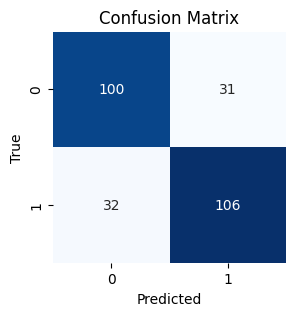

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# initialize the LabelPropagation model
test_model = ExtraTreesClassifier()

# train the model
test_model.fit(X_train_df, y_train)

# predict on the test data using LabelPropagation
y_pred = test_model.predict(X_test_df)

# print the classification report for LabelPropagation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# plot the confusion matrix for LabelPropagation
cm_provocative = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_provocative, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Since, the predictions are very low for this feature, we move ahead for now!

## **🏀Predicting `Abusive` Comments**

In [20]:
y = df[cat_cols[1]]
y.value_counts()

IsAbusive
0    647
1    351
Name: count, dtype: int64

In [21]:
ros = RandomOverSampler()
X, y = ros.fit_resample(comments, y)

y.value_counts()

IsAbusive
0    647
1    647
Name: count, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       155
           1       0.82      0.85      0.83       169

    accuracy                           0.82       324
   macro avg       0.82      0.82      0.82       324
weighted avg       0.82      0.82      0.82       324



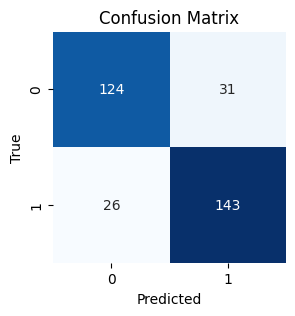

In [23]:
test_model = ExtraTreesClassifier()
test_model.fit(X_train_df, y_train)
y_pred = test_model.predict(X_test_df)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm_provocative = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_provocative, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Let us look at the other features for now!

## **🧨Predicting `Provocative` Comments**

In [24]:
y = df[cat_cols[2]]
y.value_counts()

IsProvocative
0    839
1    159
Name: count, dtype: int64

In [25]:
ros = RandomOverSampler()
X, y = ros.fit_resample(comments, y)

y.value_counts()

IsProvocative
0    839
1    839
Name: count, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       204
           1       0.98      0.99      0.98       216

    accuracy                           0.98       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.98      0.98      0.98       420



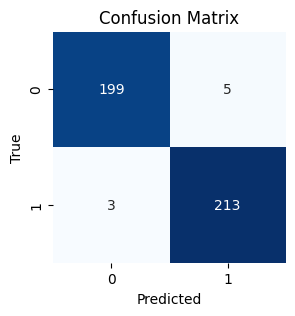

In [27]:
from sklearn.semi_supervised import LabelPropagation

provocative_model = LabelPropagation()
provocative_model.fit(X_train_df, y_train)

y_pred = provocative_model.predict(X_test_df)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

This is a  very good prediction and so for now we accept it.

## **🎗Predicting `Obscene` Comments**

In [28]:
y = df[cat_cols[3]]
y.value_counts()

IsObscene
0    898
1    100
Name: count, dtype: int64

In [29]:
ros = RandomOverSampler()
X, y = ros.fit_resample(comments, y)

y.value_counts()

IsObscene
0    898
1    898
Name: count, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       230
           1       0.99      0.98      0.98       219

    accuracy                           0.98       449
   macro avg       0.98      0.98      0.98       449
weighted avg       0.98      0.98      0.98       449



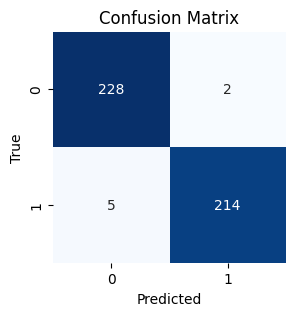

In [31]:
obscene_model = LabelPropagation()
obscene_model.fit(X_train_df, y_train)

y_pred = obscene_model.predict(X_test_df)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

This too is a good prediction and we will accept the model.

## **🙊Predicting `Hate Speech` Comments**

In [32]:
y = df[cat_cols[4]]
y.value_counts()

IsHatespeech
0    860
1    138
Name: count, dtype: int64

In [33]:
ros = RandomOverSampler()
X, y = ros.fit_resample(comments, y)

y.value_counts()

IsHatespeech
0    860
1    860
Name: count, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       214
           1       0.98      0.97      0.98       216

    accuracy                           0.98       430
   macro avg       0.98      0.98      0.98       430
weighted avg       0.98      0.98      0.98       430



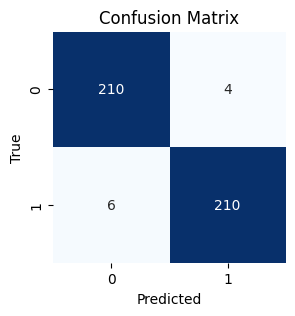

In [35]:
hate_speech_model = LabelPropagation()
hate_speech_model.fit(X_train_df, y_train)

y_pred = hate_speech_model.predict(X_test_df)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The results are acceptable and so we accept this model!

## **🎎Predicting `Racist` Comments**

In [36]:
y = df[cat_cols[5]]
y.value_counts()

IsRacist
0    873
1    125
Name: count, dtype: int64

In [37]:
ros = RandomOverSampler()
X, y = ros.fit_resample(comments, y)

y.value_counts()

IsRacist
0    873
1    873
Name: count, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       210
           1       0.98      0.98      0.98       227

    accuracy                           0.98       437
   macro avg       0.98      0.98      0.98       437
weighted avg       0.98      0.98      0.98       437



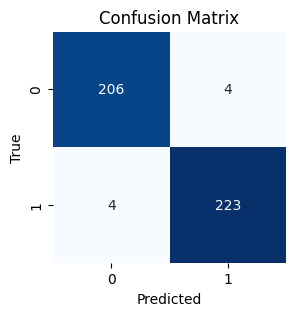

In [39]:
racist_model = LabelPropagation()
racist_model.fit(X_train_df, y_train)

y_pred = racist_model.predict(X_test_df)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

These results are acceptable, so we accept the model!

## **🧶Reconfiguring `Abusive` Comments Classification**

In [40]:
# stacking horizontally additional features for training and testing
support_features = df[['IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist']]
X = np.hstack((comments.toarray(), support_features))

In [41]:
y = df[cat_cols[1]]
y.value_counts()

IsAbusive
0    647
1    351
Name: count, dtype: int64

In [42]:
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

y.value_counts()

IsAbusive
0    647
1    647
Name: count, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       155
           1       0.98      0.95      0.96       169

    accuracy                           0.96       324
   macro avg       0.96      0.96      0.96       324
weighted avg       0.96      0.96      0.96       324



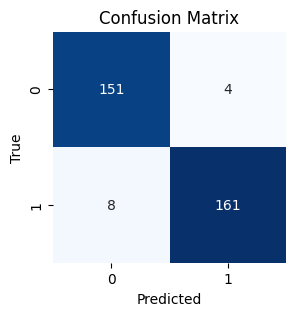

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

abusive_model = ExtraTreesClassifier(random_state=42)
abusive_model.fit(X_train, y_train)

y_pred = abusive_model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

These new prediction scores are far better than what they were earlier!

## **🥽Reconfiguring `Toxic` Comments Classification**

In [45]:
# adding additional feature for training and prediction
support_features = df[['IsAbusive', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist']]
X = np.hstack((comments.toarray(), support_features)) 

In [46]:
y = df[cat_cols[0]]
y.value_counts()

IsToxic
0    538
1    460
Name: count, dtype: int64

In [47]:
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

y.value_counts()

IsToxic
0    538
1    538
Name: count, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       138

    accuracy                           1.00       269
   macro avg       1.00      1.00      1.00       269
weighted avg       1.00      1.00      1.00       269



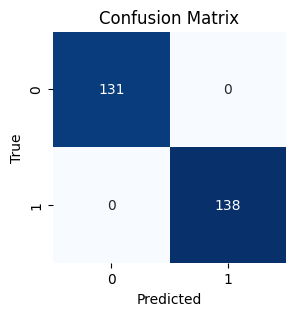

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

toxic_model = ExtraTreesClassifier(random_state=42)
toxic_model.fit(X_train, y_train)

y_pred = toxic_model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **🎁Creating Pipeline**

In [50]:
# importing required libraries
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# defining processing-modelling-predicting pipeline function
def multi_label_detector(input_text):
    
    # text preprocessing
    text = input_text.lower()
    text = re.sub(r'http\S+|www\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    text = ' '.join(lemmatized_words)
    X = vectorizer.transform([text])
    text_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # predict using the models
    IsProvocative = provocative_model.predict(text_df).reshape(-1, 1)
    IsObscene = obscene_model.predict(text_df).reshape(-1, 1)
    IsHatespeech = hate_speech_model.predict(text_df).reshape(-1, 1)
    IsRacist = racist_model.predict(text_df).reshape(-1, 1)

    # stack the arrays horizontally to include predicted data into ABUSIVE prediction
    X_extended = np.hstack((X.toarray(), IsProvocative, IsObscene, IsHatespeech, IsRacist))
    IsAbusive = abusive_model.predict(X_extended).reshape(-1, 1)

    # stack the arrays horizontally to include predicted data into TOXIC prediction
    X_extended2 = np.hstack((X.toarray(), IsAbusive, IsProvocative, IsObscene, IsHatespeech, IsRacist))
    IsToxic = toxic_model.predict(X_extended2).reshape(-1, 1)

    # create a DataFrame with all predictions
    final = pd.DataFrame({
        'IsAbusive': IsAbusive.flatten(),
        'IsToxic': IsToxic.flatten(),
        'IsProvocative': IsProvocative.flatten(),
        'IsObscene': IsObscene.flatten(),
        'IsHatespeech': IsHatespeech.flatten(),
        'IsRacist': IsRacist.flatten()
    })

    return final

# **🧵Testing Model**

In [51]:
# comments taken from wikipedia toxic comment dataset
comments = [
    "White man can't finish his sentence\nAmerica needs to wake up!!the truth of murder is there!",
    "Would you both please shut the fuck up, you don't run wikipedia, especially a stupid kid.",
    "This is a very beautiful morning, isn't it?",
    "HELLO! You disgrace to humanity. Stop wasting valuable Internet resources, youre killing the fucking planet and throw out your PC. PS it's like 3am what the fuck kinda life do you have on Wikipedia 24/7",
    "Have you bought the milk yet?"
]

In [52]:
# testing model
for comment in comments:
    print(f'{comment} \n')
    print(multi_label_detector(comment))
    print('------------------------------------------------------------------------')
    print('------------------------------------------------------------------------\n')

White man can't finish his sentence
America needs to wake up!!the truth of murder is there! 

   IsAbusive  IsToxic  IsProvocative  IsObscene  IsHatespeech  IsRacist
0          1        1              0          0             1         1
------------------------------------------------------------------------
------------------------------------------------------------------------

Would you both please shut the fuck up, you don't run wikipedia, especially a stupid kid. 

   IsAbusive  IsToxic  IsProvocative  IsObscene  IsHatespeech  IsRacist
0          1        1              0          0             0         0
------------------------------------------------------------------------
------------------------------------------------------------------------

This is a very beautiful morning, isn't it? 

   IsAbusive  IsToxic  IsProvocative  IsObscene  IsHatespeech  IsRacist
0          0        0              0          0             0         0
------------------------------------------

# **🙏THANK YOU**
---